## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

### Load the dataset

In [2]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
df.select_dtypes(include=['object']).columns.tolist()

['sex', 'smoker', 'day', 'time']

In [5]:
df.select_dtypes(include=['int','float']).columns.tolist()

['total_bill', 'tip', 'size']

### 2. Compute the average bill amount for each day.

In [6]:
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [7]:
df.groupby('sex')['tip'].sum()

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

- Male gender is more generous in giving tips

### 4. According to the data, were there more customers for dinner or lunch?

In [8]:
df.groupby('time')['size'].sum()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

- There were more customers for dinner.

### 5. Based on the statistical summary, comment on the variable 'tip'

In [9]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

- The tip ranges from 1 to 10 dollars, with the average tip given by customers being around 3 dollars.

### 6. Find the busiest day in terms of the orders?

In [12]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

- Saturday was the busiest day

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [16]:
df.total_bill.skew()

1.1332130376158205

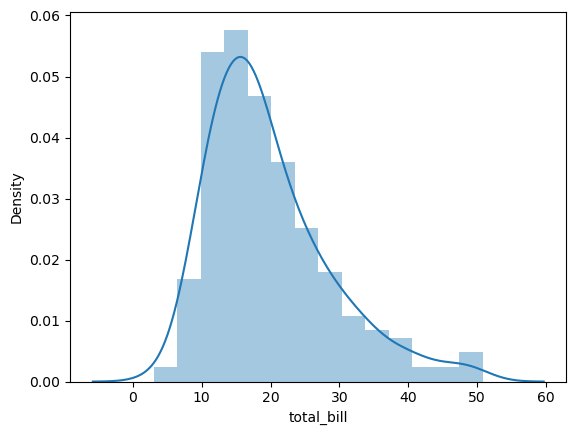

In [18]:
sns.distplot(df['total_bill'])
plt.show()

- total_bill is positively skewed

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

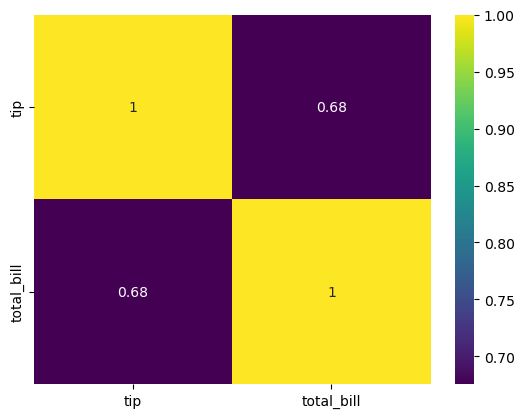

In [19]:
sns.heatmap(df[['tip','total_bill']].corr(),annot=True,cmap='viridis')
plt.show()

- As the correlation between tip and total bill is on the higher end, we can infer that tip is indeed dependent on total bill.

### 9. What is the percentage of males and females in the dataset? and display it in the plot

In [20]:
df['sex'].value_counts(normalize=True)*100

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

- The percentage of males is 64.3% and females is 35.7%

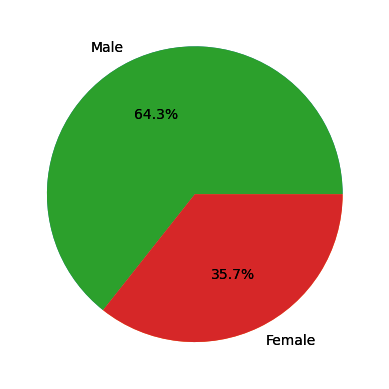

In [22]:
plt.pie(df.sex.value_counts(), autopct = '%.1f%%', labels=['Male', 'Female'])
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [37]:
pd.crosstab(df['sex'],df['smoker'])

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


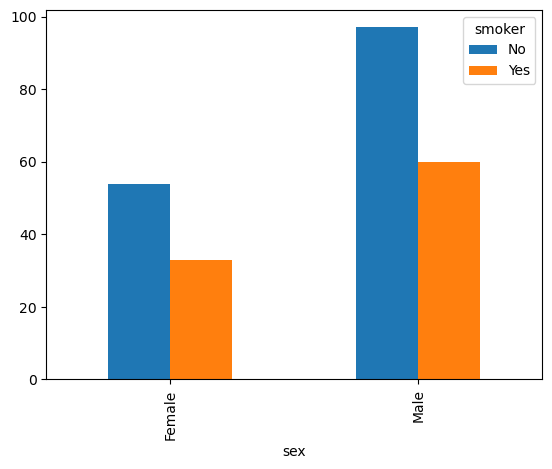

In [36]:
pd.crosstab(df['sex'],df['smoker']).plot(kind='bar')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

In [40]:
average = df.groupby('day')['tip'].mean()
print(average)

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


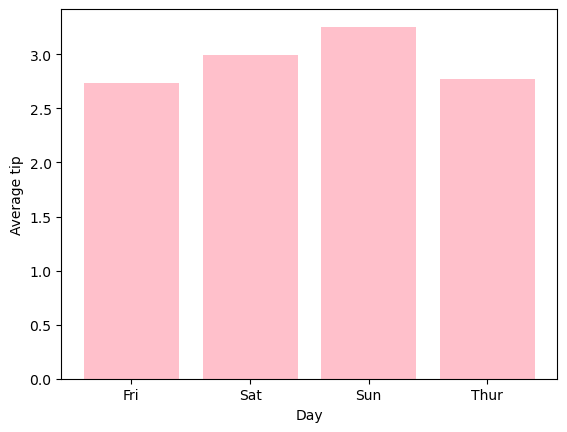

In [42]:
plt.bar(average.index, average.values, color='pink')
plt.xlabel('Day')
plt.ylabel('Average tip')
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

In [45]:
rel=df.groupby('size')['total_bill'].mean()
print(rel)

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64


- The average bill amount seems to be dependent on the group size

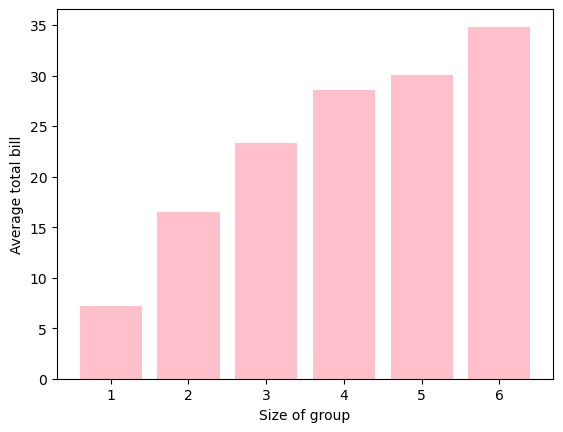

In [47]:
plt.bar(rel.index, rel.values, color='pink')
plt.xlabel('Size of group')
plt.ylabel('Average total bill')
plt.show()

- As the size of the group increases, the average total bill increases.

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

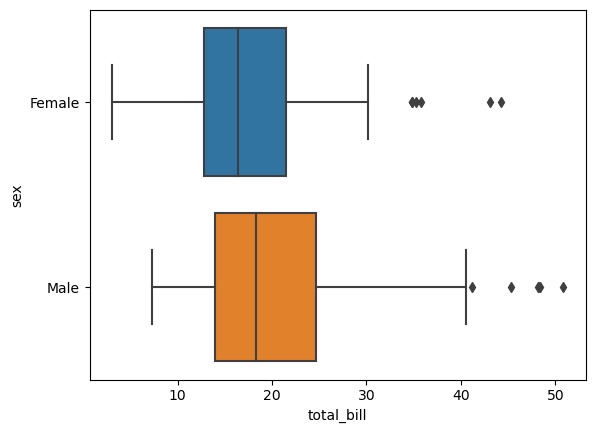

In [48]:
sns.boxplot(x=df['total_bill'], y=df['sex']);
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [49]:
df2=df.groupby(['time','day'],as_index=False)['total_bill'].max()
df2[(df2['day']=='Sat')|(df2['day']=='Sun')]

,time,day,total_bill
1,Dinner,Sat,50.81
2,Dinner,Sun,48.17


- There was no lunch order on Saturday and Sunday. 

- Maximum bill amount for saturday was 50.81

- Maximum bill amount for sunday was 48.17

### 15. Compute the percentage of missing values in the dataset.

In [51]:
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

- There are no missing values in the dataset

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [52]:
len(df[df.duplicated()])

1

- Yes, there is 1 duplicate record in the dataframe.

In [54]:
## dropping duplicate records
df.drop_duplicates(inplace=True)

In [55]:
## recheck id the duplicates are dropped or not
len(df[df.duplicated()])

0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

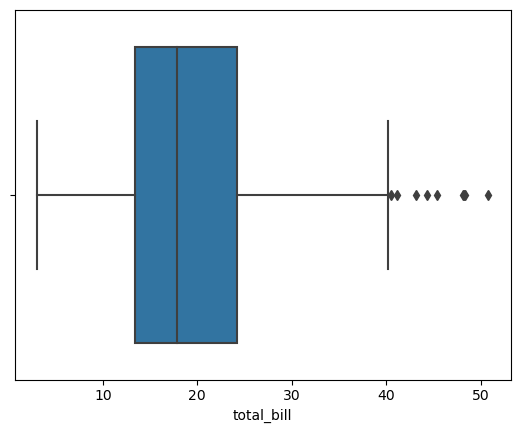

In [56]:
sns.boxplot(df['total_bill'])
plt.show()

- Outliers are present in the total_bill

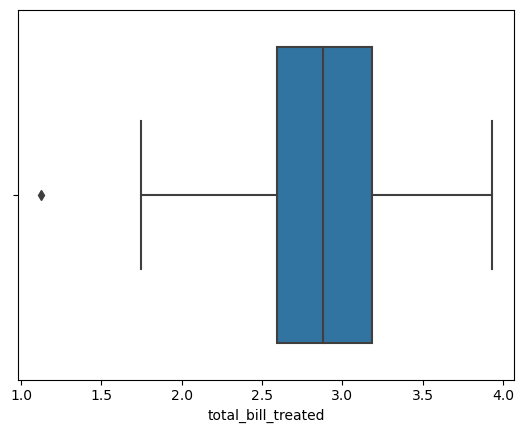

In [58]:
## let's use log transformation and transform the column total_bill and visualize the distribution
df['total_bill_treated'] = np.log(df['total_bill'])
sns.boxplot(df['total_bill_treated'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

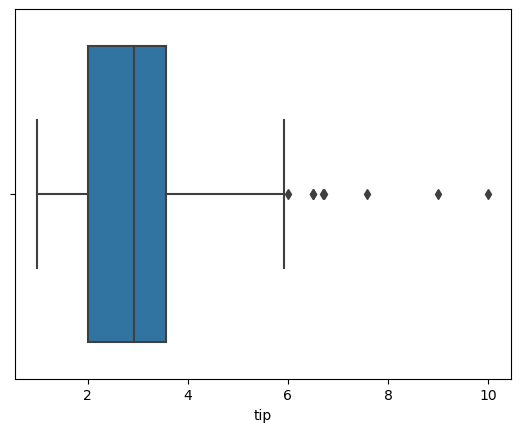

In [60]:
sns.boxplot(df['tip'])
plt.show()

- Yes, outliers are present in column 'tip'

In [61]:
# Let us use IQR method
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

2.0
3.575
1.5750000000000002


In [62]:
lower_whisker  = Q1-(1.5*IQR)
upper_whisker  = Q3+(1.5*IQR)
print(lower_whisker)
print(upper_whisker)

-0.36250000000000027
5.9375


In [63]:
df_out = df.loc[(df['tip'] < upper_whisker) & (df['tip'] > lower_whisker)] # rows without outliers

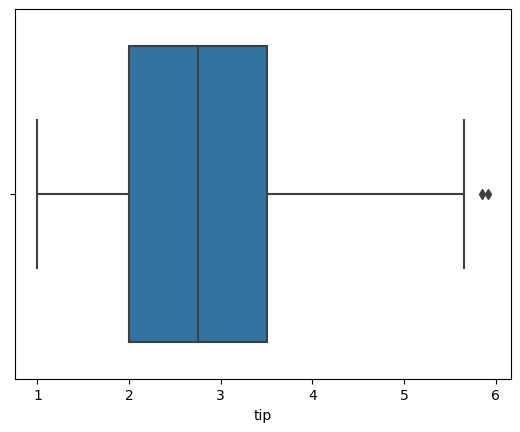

In [64]:
## distribution after outlier treatment
sns.boxplot(df_out['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [65]:
df=pd.get_dummies(df, drop_first=True)
df.sample(5)

,total_bill,tip,size,total_bill_treated,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
50,12.54,2.50,2,2.528924,1,0,0,1,0,0
211,25.89,5.16,4,3.253857,1,1,1,0,0,0
227,20.45,3.00,4,3.017983,1,0,1,0,0,0
44,30.40,5.60,4,3.414443,1,0,0,1,0,0
140,17.47,3.50,2,2.860485,0,0,0,0,1,1


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [66]:
total_bill_max = df['total_bill'].max()
print('Max', total_bill_max)
total_bill_min = df['total_bill'].min()
print('Min', total_bill_min)
range = total_bill_max-total_bill_min
print('Range', range)

mm_scaler=MinMaxScaler()
df['total_bill_processed']=mm_scaler.fit_transform(df[['total_bill']])
total_bill_mm_max=df['total_bill_processed'].max()
total_bill_mm_min=df['total_bill_processed'].min()
new_range=total_bill_mm_max-total_bill_mm_min
print('MinMaxScaler tranformed Range', new_range)

Max 50.81
Min 3.07
Range 47.74
MinMaxScaler tranformed Range 0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [67]:
tips_df= pd.read_csv('tips.csv')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [68]:
# i) Encode the categorical variables
tips_df = pd.get_dummies(tips_df,drop_first = True)
tips_df.sample(5)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
31,18.35,2.50,4,1,0,1,0,0,0
152,17.26,2.74,3,1,0,0,1,0,0
140,17.47,3.50,2,0,0,0,0,1,1
217,11.59,1.50,2,1,1,1,0,0,0
105,15.36,1.64,2,1,1,1,0,0,0


In [69]:
# ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable
X = tips_df[['total_bill', 'size', 'sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Lunch']]
print(X)

y = tips_df['tip']
print(y)

     total_bill  size  sex_Male  smoker_Yes  day_Sat  day_Sun  day_Thur  \
0         16.99     2         0           0        0        1         0   
1         10.34     3         1           0        0        1         0   
2         21.01     3         1           0        0        1         0   
3         23.68     2         1           0        0        1         0   
4         24.59     4         0           0        0        1         0   
..          ...   ...       ...         ...      ...      ...       ...   
239       29.03     3         1           0        1        0         0   
240       27.18     2         0           1        1        0         0   
241       22.67     2         1           1        1        0         0   
242       17.82     2         1           0        1        0         0   
243       18.78     2         0           0        0        0         1   

     time_Lunch  
0             0  
1             0  
2             0  
3             0  
4        

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

mm_scaler=MinMaxScaler()

X_train['total_bill'] = mm_scaler.fit_transform(X_train[['total_bill']])
X_train['size']=mm_scaler.fit_transform(X_train[['size']])
X_test['total_bill'] = mm_scaler.fit_transform(X_test[['total_bill']])
X_test['size']=mm_scaler.fit_transform(X_test[['size']])

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [72]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [73]:
#Checking the intercept for the model

intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1.6594088642111744


In [74]:
# Exploring the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for total_bill is 3.973058957440866
The coefficient for size is 0.7544754284668309
The coefficient for sex_Male is -0.08559532129684527
The coefficient for smoker_Yes is -0.19857362009310217
The coefficient for day_Sat is -0.09678185366336908
The coefficient for day_Sun is -0.1885780401882904
The coefficient for day_Thur is -0.6033779198265122
The coefficient for time_Lunch is 0.5058512566102493


In [75]:
y_prediction = regression_model.predict(X_test)

print('r_squared value of the prediction is:', r2_score(y_test, y_prediction))

r_squared value of the prediction is: 0.40937701895403844


### Happy Learning:)